In [23]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [24]:
# 폰트 한글화 세팅

# # window font setting
# font_path = 'C:/Windows/Fonts/batang.ttc'           # 한글 폰트를 적용하여 시각화

# # PJE font setting
plt.rcParams['font.family'] = 'Malgun Gothic' 

# mac font setting
#font_path = '/Library/Fonts/Arial Unicode.ttf'
#font = fm.FontProperties(fname=font_path).get_name()
#matplotlib.rc('font', family=font)

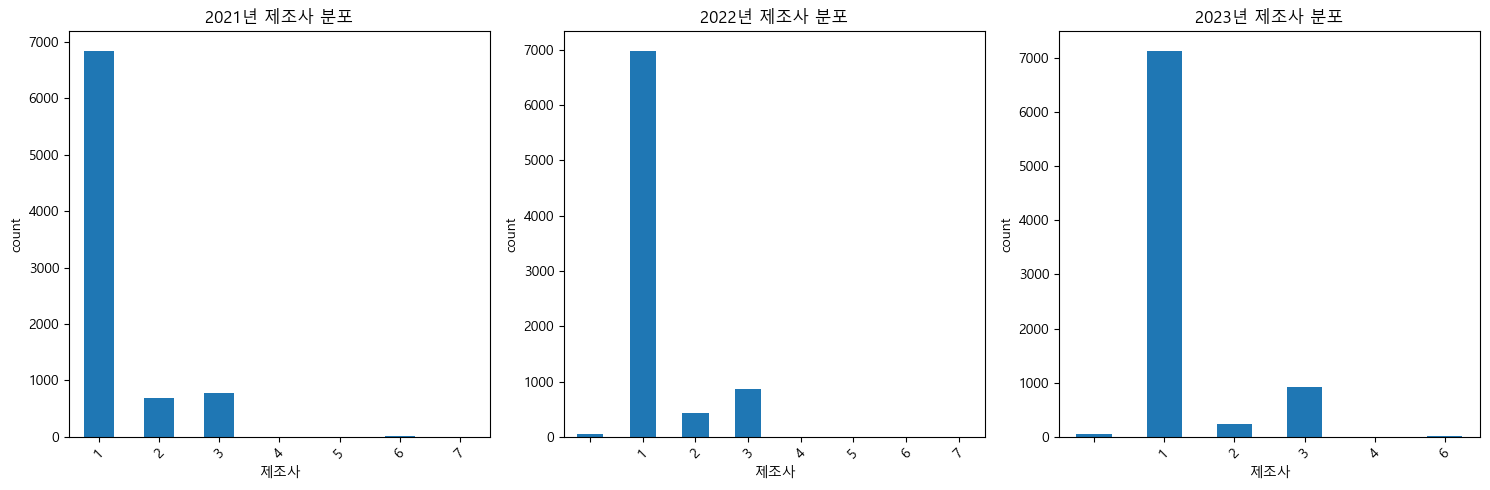

In [25]:
# 시각화 자료로 년도별 제조사 확인

# CSV 파일 읽기
phone_df = pd.read_csv('./data/phone_information.csv', low_memory=False)


# 서브플롯 생성
plt.figure(figsize=(15, 5))

# 2021년 데이터
plt.subplot(1, 3, 1)
phone_df['brand_21'].value_counts().sort_index().plot(kind='bar')
plt.title('2021년 제조사 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=45)

# 2022년 데이터
plt.subplot(1, 3, 2)
phone_df['brand_22'].value_counts().sort_index().plot(kind='bar')
plt.title('2022년 제조사 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=45)

# 2023년 데이터
plt.subplot(1, 3, 3)
phone_df['brand_23'].value_counts().sort_index().plot(kind='bar')
plt.title('2023년 제조사 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

# 데이터 형변환

In [26]:
# # 데이터 값을 unique로 찍어본 결과 str로 들어가있는 데이터가 있어 int로 형변환 해주어야 함
# print(phone_df['brand_21'].unique())
# print(phone_df['brand_22'].unique())
# print(phone_df['brand_23'].unique())
# print(phone_df['money_transfer_21'].unique())

# object 타입인 컬럼들 찾기
object_columns = phone_df.select_dtypes(include=['object']).columns

# object 타입 컬럼들을 숫자형으로 변환
for col in object_columns:
    phone_df.loc[:, col] = pd.to_numeric(phone_df[col], errors='coerce').astype('Int64')

# 변환된 컬럼 수 확인
print(f"\n변환된 컬럼 수: {len(object_columns)}개")
print("변환된 컬럼:", list(object_columns))


변환된 컬럼 수: 31개
변환된 컬럼: ['service_purchase_21', 'money_transfer_21', 'cradit_card_21', 'call_check_22', 'service_purchase_22', 'money_transfer_22', 'cradit_card_22', 'agency_purchase_22', 'machine_purchase_22', 'phone_owner_22', 'data_22', 'dmb_22', 'agency_22', 'voice_service_22', 'data_service_22', 'use_date_22', 'brand_22', 'call_check_23', 'service_purchase_23', 'money_transfer_23', 'cradit_card_23', 'agency_purchase_23', 'machine_purchase_23', 'phone_owner_23', 'data_23', 'dmb_23', 'agency_23', 'voice_service_23', 'data_service_23', 'use_date_23', 'brand_23']


# 값이 없는 데이터 제거

In [27]:
# NA값이 있는 컬럼들 확인

na_columns = phone_df.columns[phone_df.isna().any()].tolist()
print("NA가 있는 컬럼들:")
for col in na_columns:
    na_count = phone_df[col].isna().sum()
    print(f"{col}: {na_count}개의 NA")

print("\n전체 NA 제거 전 데이터 크기:", phone_df.shape)

# 방법 1: NA가 있는 행을 모두 제거
phone_df = phone_df.dropna()
print("\n전체 NA 제거 후 데이터 크기:", phone_df.shape)

NA가 있는 컬럼들:
service_purchase_21: 214개의 NA
money_transfer_21: 214개의 NA
cradit_card_21: 214개의 NA
call_check_22: 45개의 NA
service_purchase_22: 149개의 NA
money_transfer_22: 149개의 NA
cradit_card_22: 149개의 NA
agency_purchase_22: 5개의 NA
machine_purchase_22: 5개의 NA
phone_owner_22: 5개의 NA
data_22: 45개의 NA
dmb_22: 45개의 NA
agency_22: 45개의 NA
voice_service_22: 45개의 NA
data_service_22: 45개의 NA
use_date_22: 45개의 NA
brand_22: 45개의 NA
call_check_23: 45개의 NA
service_purchase_23: 85개의 NA
money_transfer_23: 85개의 NA
cradit_card_23: 85개의 NA
agency_purchase_23: 4개의 NA
machine_purchase_23: 4개의 NA
phone_owner_23: 4개의 NA
data_23: 45개의 NA
dmb_23: 45개의 NA
agency_23: 45개의 NA
voice_service_23: 45개의 NA
data_service_23: 45개의 NA
use_date_23: 45개의 NA
brand_23: 45개의 NA

전체 NA 제거 전 데이터 크기: (8342, 73)

전체 NA 제거 후 데이터 크기: (8071, 73)


In [28]:
# 3년간 삼성을 쓰지 않는 고객 제거

phone_df = phone_df[(phone_df['brand_21'] == 1) | 
                    (phone_df['brand_22'] == 1) ]

print("\n삼성을 쓰지 않는 사람 제거 후 데이터 크기:", phone_df.shape)


삼성을 쓰지 않는 사람 제거 후 데이터 크기: (7324, 73)


# 2021 -> 2022 (이탈자), 2022 -> 2023 (이탈자), 2021 -> 2022 -> 2023 (복귀자)

In [29]:
# 2022년도 이탈자

# 값 빼줌
samsung_users22 = phone_df[
   (phone_df['brand_21'] == 1)
]
changed_users22 = phone_df[
   (phone_df['brand_21'] == 1) & 
   (phone_df['brand_22'] != 1)
]

# 결과 확인
print("브랜드 변경 고객 수:", len(changed_users22))
print('2022 이탈률: ', (len(changed_users22) / len(samsung_users22)))
print("\n변경된 사례:")
print(changed_users22[['pid', 'brand_21', 'brand_22']])

# 어떤 브랜드로 변경되었는지 분포 확인
brand_change_22 = changed_users22['brand_22'].value_counts()
print("\n변경된 브랜드 분포:")
print(brand_change_22)

브랜드 변경 고객 수: 523
2022 이탈률:  0.0789433962264151

변경된 사례:
            pid  brand_21 brand_22
1         10002         1        3
72       440001         1        2
75       440004         1        2
95       550002         1        3
105      600005         1        3
...         ...       ...      ...
8215  116530001         1        3
8216  116530002         1        3
8225  116720002         1        2
8226  116720003         1        3
8227  116720004         1        3

[523 rows x 3 columns]

변경된 브랜드 분포:
brand_22
3    308
2    212
6      2
4      1
Name: count, dtype: int64


In [30]:
# 2023년도 이탈자

changed_users23 = phone_df[
   (phone_df['brand_22'] == 1) & 
   (phone_df['brand_23'] != 1)
]

samsung_users23 = phone_df[
   (phone_df['brand_22'] == 1) 
]

print('2022 이탈률: ', (len(changed_users23) / len(samsung_users23)))

# 결과 확인
print("브랜드 변경 고객 수:", len(changed_users23))
print("\n변경된 사례:")
print(changed_users23[['pid', 'brand_22', 'brand_23']])

# 어떤 브랜드로 변경되었는지 분포 확인
brand_change_23 = changed_users23['brand_23'].value_counts()
print("\n변경된 브랜드 분포:")
print(brand_change_23)

2022 이탈률:  0.06499044258197324
브랜드 변경 고객 수: 442

변경된 사례:
            pid brand_22 brand_23
19       100002        1        3
23       160001        1        2
39       300003        1        3
40       300004        1        3
43       310003        1        3
...         ...      ...      ...
8152  115890003        1        3
8156  115910004        1        3
8238  116990001        1        2
8242  117020001        1        2
8265  117300001        1        2

[442 rows x 3 columns]

변경된 브랜드 분포:
brand_23
3    329
2    106
4      4
6      3
Name: count, dtype: int64


In [31]:
# 2023년도 복귀자       ->     복귀자는 다시 생각해보겠지만 일단 이탈자만 생각하기로 함

returned_users = phone_df[
    (phone_df['brand_21'] == 1) &
   (phone_df['brand_22'] != 1) & 
   (phone_df['brand_23'] == 1)
]

# 결과 확인
print("브랜드 변경 고객 수:", len(returned_users))
print("\n변경된 사례:")
print(returned_users[['pid', 'brand_21', 'brand_22', 'brand_23']])

# 어떤 브랜드로 변경되었는지 분포 확인
brand_return_23 = returned_users['brand_23'].value_counts()
print("\n변경된 브랜드 분포:")
print(brand_return_23)

브랜드 변경 고객 수: 333

변경된 사례:
            pid  brand_21 brand_22 brand_23
1         10002         1        3        1
72       440001         1        2        1
75       440004         1        2        1
105      600005         1        3        1
107      620001         1        3        1
...         ...       ...      ...      ...
8098  115420002         1        2        1
8153  115910001         1        2        1
8215  116530001         1        3        1
8216  116530002         1        3        1
8225  116720002         1        2        1

[333 rows x 4 columns]

변경된 브랜드 분포:
brand_23
1    333
Name: count, dtype: int64


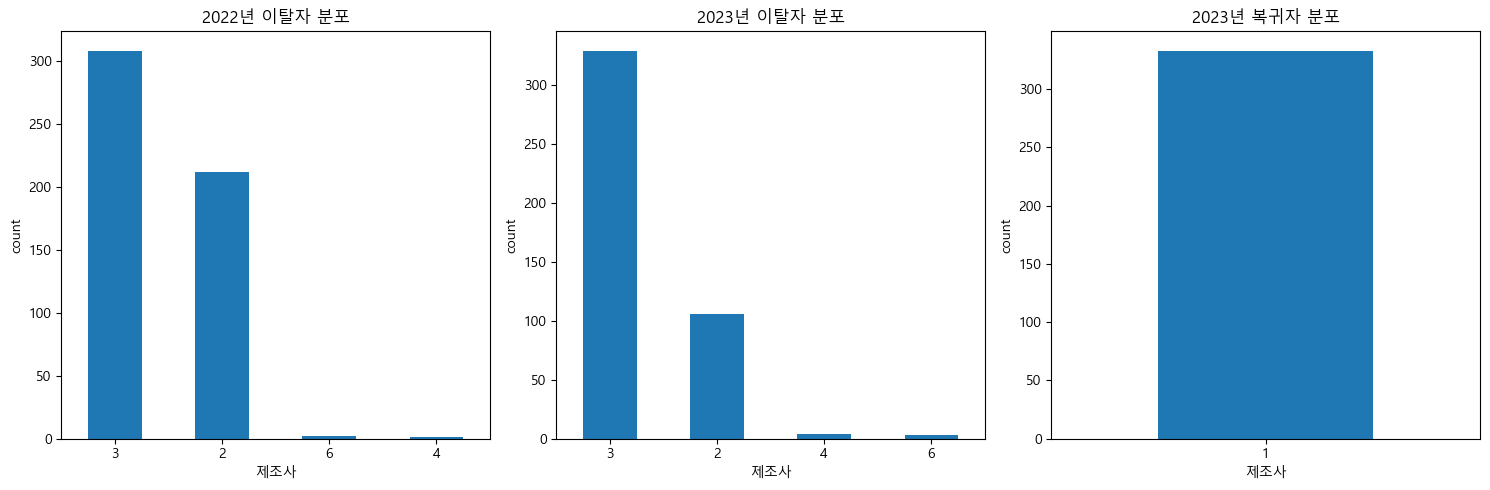

In [32]:
# 시각화 자료로 이탈자, 복귀자 확인

# 서브플롯 생성
plt.figure(figsize=(15, 5))

# 2021년 데이터
plt.subplot(1, 3, 1)
brand_change_22.plot(kind='bar')
plt.title('2022년 이탈자 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=0)

# 2022년 데이터
plt.subplot(1, 3, 2)
brand_change_23.plot(kind='bar')
plt.title('2023년 이탈자 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=0)

# 2023년 데이터
plt.subplot(1, 3, 3)
brand_return_23.plot(kind='bar')
plt.title('2023년 복귀자 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=0)

plt.tight_layout()

plt.show()

In [33]:
total_customer = phone_df['pid'].count()
print(f'전체 인원 수 :{total_customer}')

total_samsung_21 = phone_df[phone_df['brand_21'] == 1]['brand_21'].count()
print(f'21년도 삼성 인원 수 :{total_samsung_21}')

total_samsung_22 = phone_df[phone_df['brand_22'] == 1]['brand_22'].count()
print(f'22년도 삼성 인원 수 :{total_samsung_22}')

total_samsung_23 = phone_df[phone_df['brand_23'] == 1]['brand_23'].count()
print(f'23년도 삼성 인원 수 :{total_samsung_23}')

total_chaged = len(changed_users22) + len(changed_users23)

print(f'전체 이탈자 수 :{total_chaged}')

total_merged = phone_df[phone_df['brand_23'] == 1]['brand_23'].count() + total_chaged
print(f'이탈자를 포함한 총 고객 수 :{total_merged}')

전체 인원 수 :7324
21년도 삼성 인원 수 :6625
22년도 삼성 인원 수 :6801
23년도 삼성 인원 수 :6692
전체 이탈자 수 :965
이탈자를 포함한 총 고객 수 :7657


In [34]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 8341
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   pid                  7324 non-null   int64 
 1   email_21             7324 non-null   int64 
 2   messenger_21         7324 non-null   int64 
 3   blog_21              7324 non-null   int64 
 4   cloud_21             7324 non-null   int64 
 5   call_check_21        7324 non-null   int64 
 6   service_purchase_21  7324 non-null   object
 7   money_transfer_21    7324 non-null   object
 8   cradit_card_21       7324 non-null   object
 9   agency_purchase_21   7324 non-null   int64 
 10  machine_purchase_21  7324 non-null   int64 
 11  phone_owner_21       7324 non-null   int64 
 12  data_21              7324 non-null   int64 
 13  dmb_21               7324 non-null   int64 
 14  agency_21            7324 non-null   int64 
 15  voice_service_21     7324 non-null   int64 
 16  data_servic

In [35]:
phone_df.describe()

,pid,email_21,messenger_21,blog_21,cloud_21,call_check_21,agency_purchase_21,machine_purchase_21,phone_owner_21,data_21,...,email_23,messenger_23,blog_23,cloud_23,age_23,school_23,marry_23,salary_23,job_23,religion_23
count,7.324000e+03,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,...,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000
mean,4.959776e+07,1.295057,1.100355,1.932960,1.841480,1.688012,46.721737,7.801202,1.885582,2.999044,...,1.431049,1.048744,1.946068,1.863872,5.590524,3.260923,1.857728,5.311851,1.357182,1.714500
std,3.804781e+07,0.456100,0.300493,0.250108,0.365253,0.463337,18.528685,10.848381,1.368483,0.701240,...,0.495257,0.215347,0.225899,0.342948,1.699097,0.895493,0.618544,3.606020,0.479202,0.451683
min,1.000100e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1.610008e+07,1.000000,1.000000,2.000000,2.000000,1.000000,34.000000,0.000000,1.000000,3.000000,...,1.000000,1.000000,2.000000,2.000000,5.000000,3.000000,2.000000,1.000000,1.000000,1.000000
50%,5.049500e+07,1.000000,1.000000,2.000000,2.000000,2.000000,45.000000,0.000000,1.000000,3.000000,...,1.000000,1.000000,2.000000,2.000000,6.000000,3.000000,2.000000,6.000000,1.000000,2.000000
75%,6.923500e+07,2.000000,1.000000,2.000000,2.000000,2.000000,56.000000,14.000000,4.000000,3.000000,...,2.000000,1.000000,2.000000,2.000000,7.000000,4.000000,2.000000,8.000000,2.000000,2.000000
max,1.183300e+08,2.000000,2.000000,2.000000,2.000000,2.000000,200.000000,110.000000,5.000000,4.000000,...,2.000000,2.000000,2.000000,2.000000,8.000000,5.000000,4.000000,18.000000,2.000000,2.000000


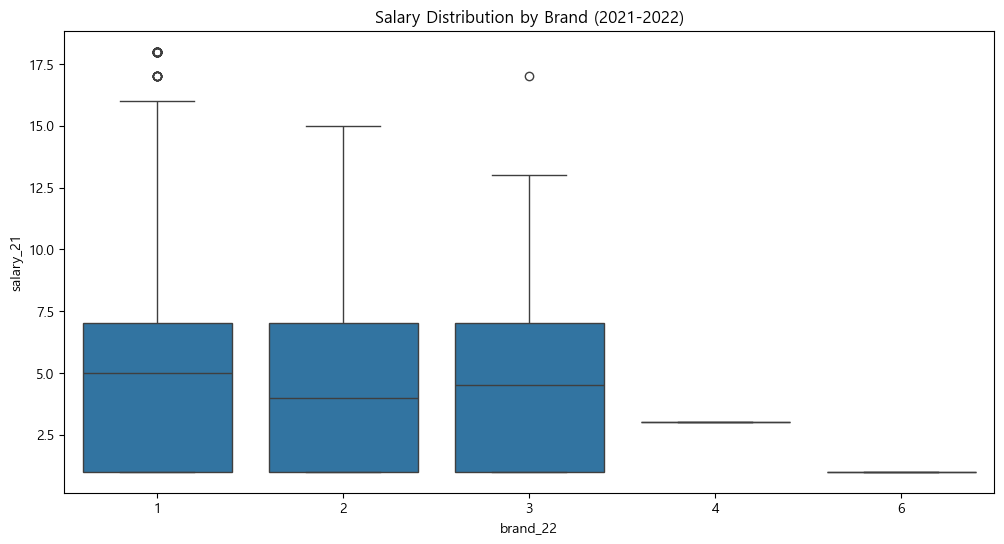

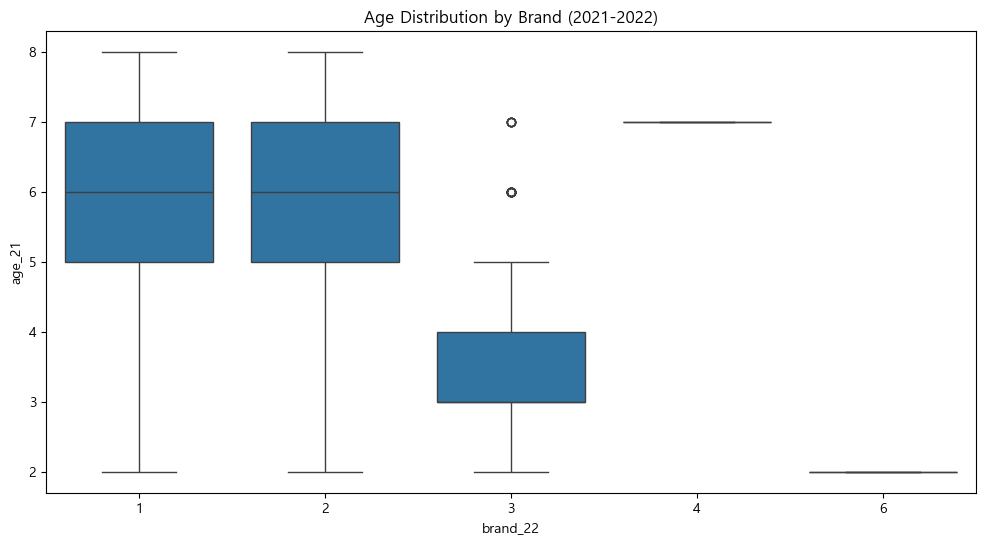

In [36]:
# 각 변수별 이탈 관계 분석 (예: salary와 이탈)
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand_22', y='salary_21', data=phone_df)
plt.title('Salary Distribution by Brand (2021-2022)')
plt.show()

# 연령대별 이탈 패턴
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand_22', y='age_21', data=phone_df)
plt.title('Age Distribution by Brand (2021-2022)')
plt.show()

c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


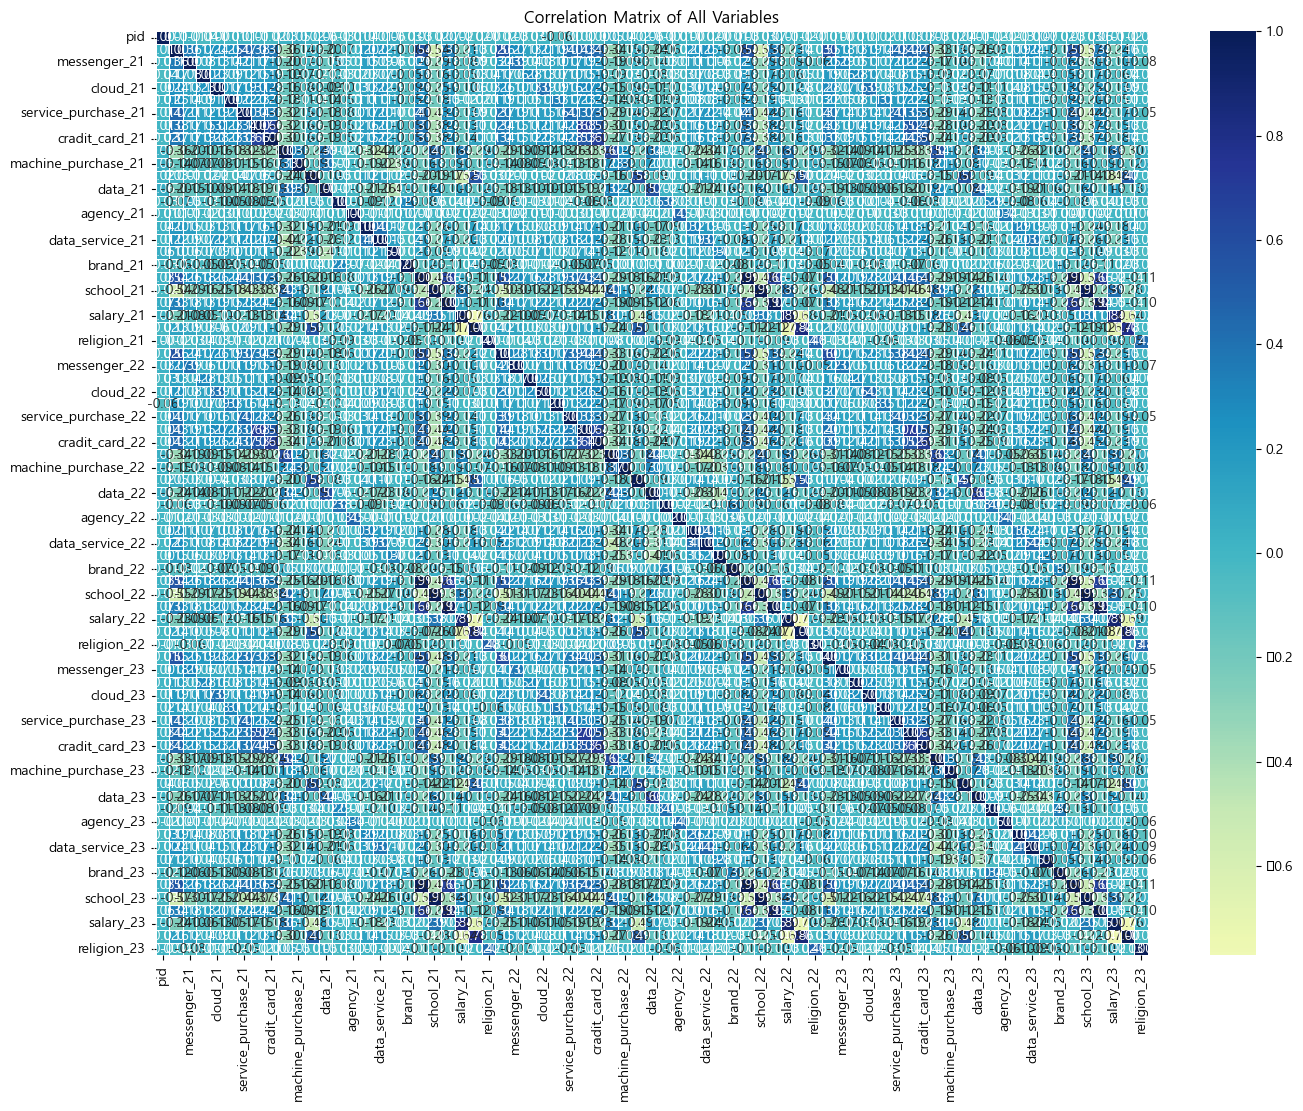

In [40]:
# 전체 컬럼에 대한 상관 행렬 계산
correlation_matrix_all = phone_df.corr()

# 히트맵 시각화
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_all, annot=True, cmap='YlGnBu', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of All Variables')
plt.show()

# RandomForest 활용 1 (컬럼 지정)

Random Forest 성능:               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1429
           1       0.44      0.19      0.27       240

    accuracy                           0.85      1669
   macro avg       0.66      0.58      0.59      1669
weighted avg       0.81      0.85      0.82      1669

Random Forest 정확도: 0.8484


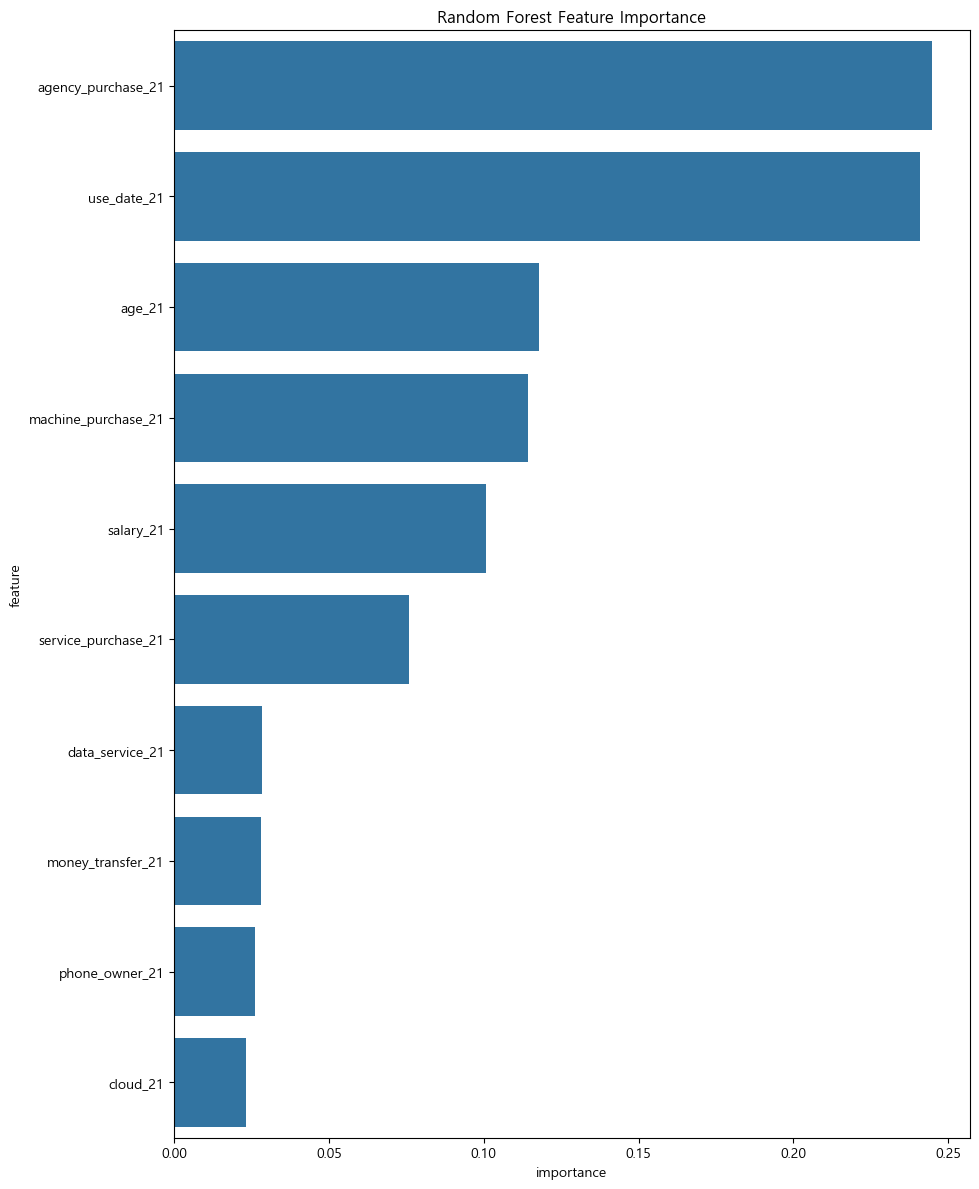

In [46]:
# 2022년도 이탈자에 대한 데이터 훈련 (랜덤포레스트 + XGBoost)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
# 데이터 준비

# column 데이터
selected_features = [
    'machine_purchase_21',
    'agency_purchase_21',
    'data_service_21',
    'salary_21',
    'age_21',
    'cloud_21',
    'service_purchase_21',
    'use_date_21',
    'phone_owner_21',
    'money_transfer_21'
]

# 범주형 변수 전처리
le = LabelEncoder()
categorical_features = ['service_purchase_21', 'money_transfer_21']

# 범주형 변수 인코딩
for feature in categorical_features:
    phone_df[feature] = le.fit_transform(phone_df[feature].astype(str))

# 데이터 X, y
X = phone_df[selected_features]
y = (phone_df['brand_22'] != 1).astype(int)

# 데이터 훈련
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# 예측 및 평가
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"Random Forest 성능: {classification_report(y_test, rf_pred)}")
print(f"Random Forest 정확도: {rf_accuracy:.4f}")

# Random Forest 특성 중요도
plt.figure(figsize=(18, 12))
importance_rf = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_clf.feature_importances_
})
importance_rf = importance_rf.sort_values('importance', ascending=False)

plt.subplot(1, 2, 1)
sns.barplot(data=importance_rf, x='importance', y='feature')
plt.title('Random Forest Feature Importance')

plt.tight_layout()
plt.show()

# RandomForest 활용 2 (컬럼 전체)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_24324\2074144455.py:3: DtypeWarning: Columns (29,33,34,35,36,37,38,39,40,41,42,53,57,58,59,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  phone_df = pd.read_csv(file_path)


Random Forest 성능:               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1429
           1       0.80      0.47      0.59       240

    accuracy                           0.91      1669
   macro avg       0.86      0.73      0.77      1669
weighted avg       0.90      0.91      0.90      1669

Random Forest 정확도: 0.9065


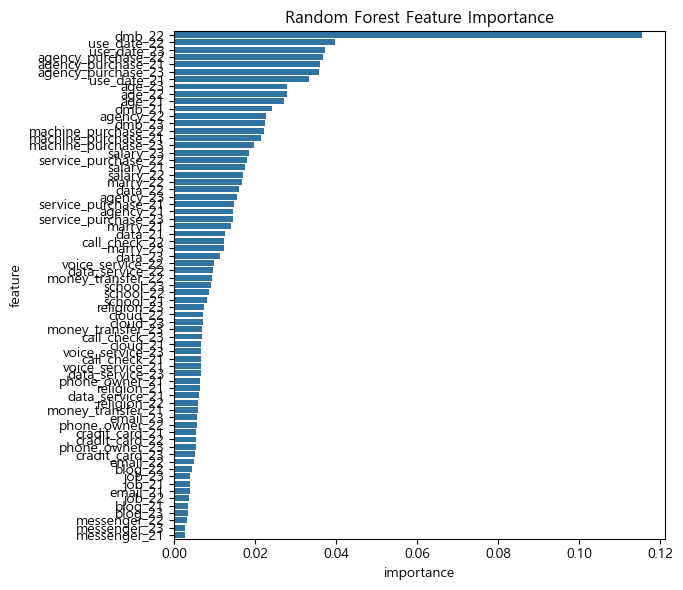

In [43]:
# 데이터 불러오기
file_path = './data/phone_information.csv'
phone_df = pd.read_csv(file_path)

# 데이터 전처리: 문자열을 정수형으로 변환
phone_df = phone_df.apply(pd.to_numeric, errors='coerce')

# 범주형 변수 전처리
le = LabelEncoder()
categorical_features = ['service_purchase_21', 'money_transfer_21']

# 범주형 변수 인코딩
for feature in categorical_features:
    phone_df[feature] = le.fit_transform(phone_df[feature].astype(str))

# 전체 컬럼을 selected_features에 담기
selected_features = [col for col in phone_df.columns if col not in ['pid', 'churn', 'brand_22', 'brand_21', 'brand_22', 'brand_23']]

# 데이터 X, y
X = phone_df[selected_features]
y = (phone_df['brand_22'] != 1).astype(int)

# 데이터 훈련
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# 예측 및 평가
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"Random Forest 성능: {classification_report(y_test, rf_pred)}")
print(f"Random Forest 정확도: {rf_accuracy:.4f}")

# Random Forest 특성 중요도
plt.figure(figsize=(12, 6))
importance_rf = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_clf.feature_importances_
})
importance_rf = importance_rf.sort_values('importance', ascending=False)

plt.subplot(1, 2, 1)
sns.barplot(data=importance_rf, x='importance', y='feature')
plt.title('Random Forest Feature Importance')

plt.tight_layout()
plt.show()

# ROC 시각화

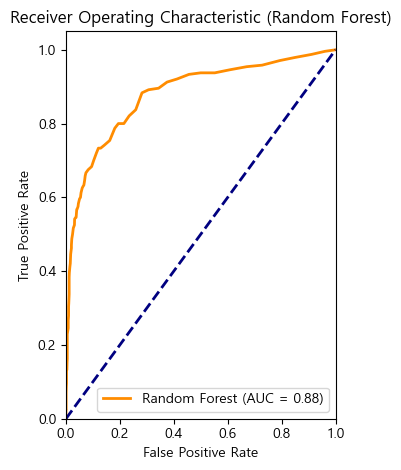

In [44]:
from sklearn.metrics import roc_curve, auc

# ROC Curve 시각화
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Gradient Boosting  활용 1 

In [48]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 데이터 불러오기
file_path = './data/phone_information.csv'
phone_df = pd.read_csv(file_path)

# 데이터 전처리: 문자열을 정수형으로 변환
phone_df = phone_df.apply(pd.to_numeric, errors='coerce')

# NaN 값 처리: NaN 값을 0으로 채우기
phone_df.fillna(0, inplace=True)

# 범주형 변수 전처리
le = LabelEncoder()
categorical_features = ['service_purchase_21', 'money_transfer_21']

for feature in categorical_features:
    phone_df[feature] = le.fit_transform(phone_df[feature].astype(str))

# 전체 컬럼을 selected_features에 담기
selected_features = [col for col in phone_df.columns if col not in ['pid', 'churn', 'brand_22', 'brand_21', 'brand_22', 'brand_23']]

# 데이터 X, y
X = phone_df[selected_features]
y = (phone_df['brand_22'] != 1).astype(int)

# 데이터 훈련
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting 모델 학습
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

# 예측 및 평가
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print(f"Gradient Boosting 성능: {classification_report(y_test, gb_pred)}")
print(f"Gradient Boosting 정확도: {gb_accuracy:.4f}")



C:\Users\Playdata\AppData\Local\Temp\ipykernel_24324\1450920431.py:11: DtypeWarning: Columns (29,33,34,35,36,37,38,39,40,41,42,53,57,58,59,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  phone_df = pd.read_csv(file_path)


Gradient Boosting 성능:               precision    recall  f1-score   support

           0       0.92      0.96      0.94      1429
           1       0.69      0.49      0.57       240

    accuracy                           0.89      1669
   macro avg       0.80      0.73      0.76      1669
weighted avg       0.88      0.89      0.89      1669

Gradient Boosting 정확도: 0.8945


# 15개 상관관계 높은 컬러만 남기고, GradientBoost 고객 이탈 예측

C:\Users\Playdata\AppData\Local\Temp\ipykernel_24324\4073793927.py:11: DtypeWarning: Columns (29,33,34,35,36,37,38,39,40,41,42,53,57,58,59,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  phone_df = pd.read_csv(file_path)


Gradient Boosting 성능:               precision    recall  f1-score   support

           0       0.94      0.97      0.96      1429
           1       0.79      0.62      0.70       240

    accuracy                           0.92      1669
   macro avg       0.87      0.80      0.83      1669
weighted avg       0.92      0.92      0.92      1669

Gradient Boosting 정확도: 0.9227


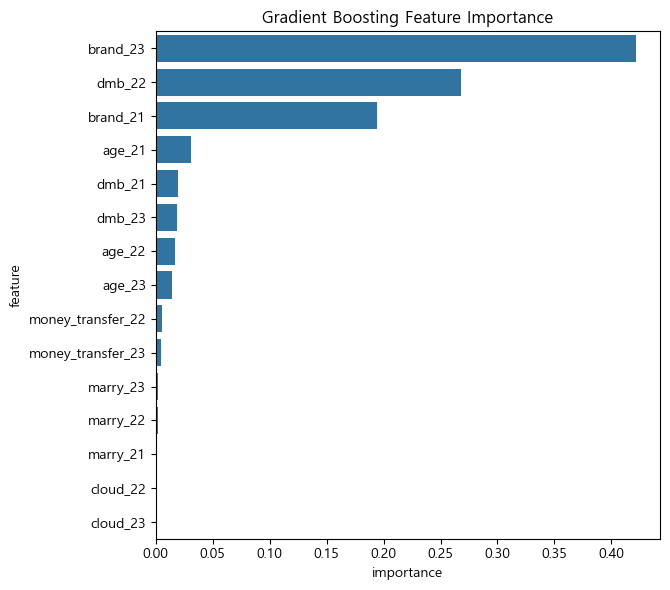

In [53]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
file_path = './data/phone_information.csv'
phone_df = pd.read_csv(file_path)

# 데이터 전처리: 문자열을 정수형으로 변환
phone_df = phone_df.apply(pd.to_numeric, errors='coerce')

# NaN 값 처리: NaN 값을 0으로 채우기
phone_df.fillna(0, inplace=True)

# 범주형 변수 전처리
le = LabelEncoder()
categorical_features = ['service_purchase_21', 'money_transfer_21']

for feature in categorical_features:
    phone_df[feature] = le.fit_transform(phone_df[feature].astype(str))

# 상관 관계 분석
correlation_matrix = phone_df.corr()

# 상관 관계가 높은 상위 15개의 특성 선택 (이탈 여부와 가장 높은 상관 관계를 갖는 특성 선택)
target = 'brand_22'
correlation_with_target = correlation_matrix[target].drop(target)
top_15_features = correlation_with_target.abs().sort_values(ascending=False).head(15).index.tolist()

# 데이터 X, y
X = phone_df[top_15_features]
y = (phone_df['brand_22'] != 1).astype(int)  # 이탈자(1) 예측

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting 모델 학습
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

# 예측 및 평가
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print(f"Gradient Boosting 성능: {classification_report(y_test, gb_pred)}")
print(f"Gradient Boosting 정확도: {gb_accuracy:.4f}")

# Gradient Boosting 특성 중요도
plt.figure(figsize=(12, 6))
importance_gb = pd.DataFrame({
    'feature': top_15_features,
    'importance': gb_clf.feature_importances_
})
importance_gb = importance_gb.sort_values('importance', ascending=False)

plt.subplot(1, 2, 2)
sns.barplot(data=importance_gb, x='importance', y='feature')
plt.title('Gradient Boosting Feature Importance')

plt.tight_layout()
plt.show()


C:\Users\Playdata\AppData\Local\Temp\ipykernel_24324\1816721689.py:12: DtypeWarning: Columns (29,33,34,35,36,37,38,39,40,41,42,53,57,58,59,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  phone_df = pd.read_csv(file_path)


[LightGBM] [Info] Number of positive: 1115, number of negative: 5558
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 76
[LightGBM] [Info] Number of data points in the train set: 6673, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167091 -> initscore=-1.606384
[LightGBM] [Info] Start training from score -1.606384
LightGBM 성능:               precision    recall  f1-score   support

           0       0.94      0.97      0.96      1429
           1       0.80      0.62      0.70       240

    accuracy                           0.92      1669
   macro avg       0.87      0.80      0.83      1669
weighted avg       0.92      0.92      0.92      1669

LightGBM 정확도: 0.9227
Gradient Boosting 성능:               precision    recall  f1-score   support

         

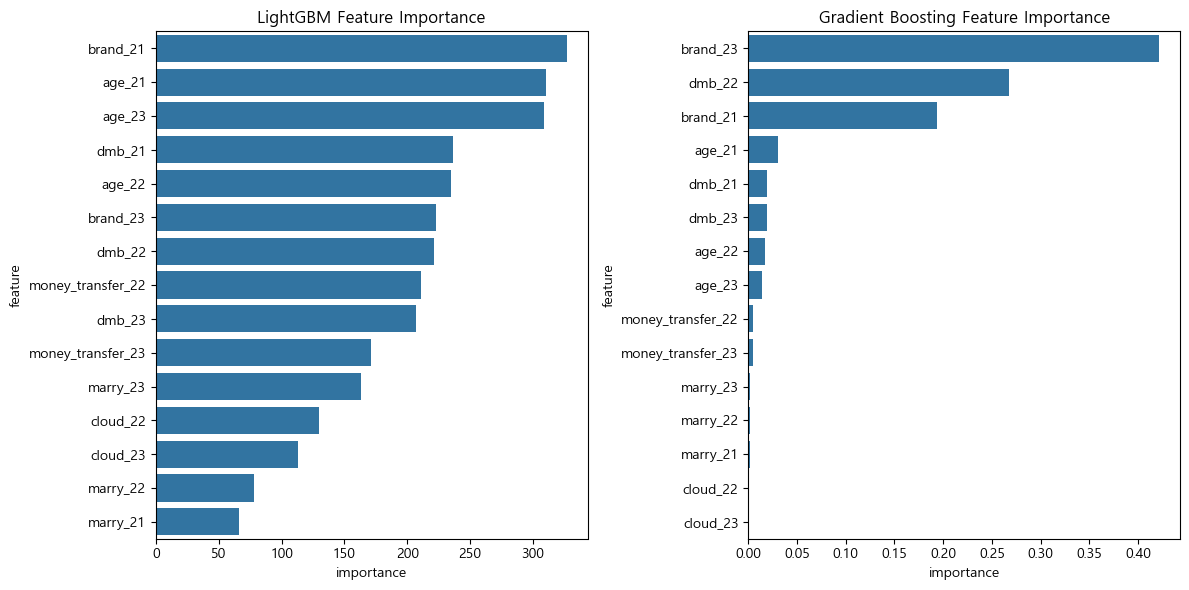

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

# 데이터 불러오기
file_path = './data/phone_information.csv'
phone_df = pd.read_csv(file_path)

# 데이터 전처리: 문자열을 정수형으로 변환
phone_df = phone_df.apply(pd.to_numeric, errors='coerce')

# NaN 값 처리: NaN 값을 0으로 채우기
phone_df.fillna(0, inplace=True)

# 범주형 변수 전처리
le = LabelEncoder()
categorical_features = ['service_purchase_21', 'money_transfer_21']

for feature in categorical_features:
    phone_df[feature] = le.fit_transform(phone_df[feature].astype(str))

# 상관 관계 분석
correlation_matrix = phone_df.corr()

# 상관 관계가 높은 상위 15개의 특성 선택 (이탈 여부와 가장 높은 상관 관계를 갖는 특성 선택)
target = 'brand_22'
correlation_with_target = correlation_matrix[target].drop(target)
top_15_features = correlation_with_target.abs().sort_values(ascending=False).head(15).index.tolist()

# 데이터 X, y
X = phone_df[top_15_features]
y = (phone_df['brand_22'] != 1).astype(int)  # 이탈자(1) 예측

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **LightGBM 모델 학습**
lgb_clf = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_clf.fit(X_train, y_train)

# 예측 및 평가
lgb_pred = lgb_clf.predict(X_test)
lgb_accuracy = accuracy_score(y_test, lgb_pred)

print(f"LightGBM 성능: {classification_report(y_test, lgb_pred)}")
print(f"LightGBM 정확도: {lgb_accuracy:.4f}")

# **Gradient Boosting 모델 학습**
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

# 예측 및 평가
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print(f"Gradient Boosting 성능: {classification_report(y_test, gb_pred)}")
print(f"Gradient Boosting 정확도: {gb_accuracy:.4f}")

# 특성 중요도 시각화 (LightGBM)
plt.figure(figsize=(12, 6))
importance_lgb = pd.DataFrame({
    'feature': top_15_features,
    'importance': lgb_clf.feature_importances_
})
importance_lgb = importance_lgb.sort_values('importance', ascending=False)

plt.subplot(1, 2, 1)
sns.barplot(data=importance_lgb, x='importance', y='feature')
plt.title('LightGBM Feature Importance')

# 특성 중요도 시각화 (Gradient Boosting)
importance_gb = pd.DataFrame({
    'feature': top_15_features,
    'importance': gb_clf.feature_importances_
})
importance_gb = importance_gb.sort_values('importance', ascending=False)

plt.subplot(1, 2, 2)
sns.barplot(data=importance_gb, x='importance', y='feature')
plt.title('Gradient Boosting Feature Importance')

plt.tight_layout()
plt.show()


# 1. 모델의 동작 방식 차이
LightGBM과 Gradient Boosting은 모두 Gradient Boosting 기법을 기반으로 하지만, 알고리즘 구현 방식과 모델 학습 과정에서 약간의 차이가 있습니다. 이로 인해 두 모델이 특성 중요도를 다르게 평가할 수 있습니다. 각 모델은 특성의 분할 방식이나 오버피팅을 방지하기 위한 전략에서 다르게 동작할 수 있습니다.

LightGBM은 Histogram-based 방식으로 트리를 생성하고, Gradient Boosting은 Traditional Gradient Boosting 방식으로 트리를 생성합니다. 이로 인해 특성 선택에 대한 우선순위가 다를 수 있습니다.

# 2. 모델의 파라미터 차이
각 모델에서 사용하는 하이퍼파라미터(예: learning_rate, max_depth, n_estimators, min_samples_split)가 다를 수 있습니다. 이러한 파라미터들이 모델의 학습 속도와 과적합 방지에 영향을 미치므로, 특성 중요도가 달라질 수 있습니다.

예를 들어, Gradient Boosting에서는 learning_rate가 매우 중요한 역할을 하며, LightGBM에서는 num_leaves와 같은 다른 하이퍼파라미터들이 성능에 영향을 줄 수 있습니다.

# 3. 모델의 특성 선택
특성 중요도는 모델이 각 특성을 얼마나 많이 사용했는지에 기반한 특성 선택의 중요도입니다. 두 모델이 동일한 데이터셋을 사용하더라도, 각각의 모델이 특정 특성에 대해 더 많은 분할을 수행할 수 있기 때문에 중요도가 달라질 수 있습니다.

예를 들어, **brand_23**이 두 모델에서 모두 높은 중요도를 가지는 경우, 이는 해당 특성이 두 모델에서 모두 이탈 예측에 중요한 역할을 했기 때문일 수 있습니다. 반면, money_transfer_21 등의 특성은 각 모델이 다르게 학습하면서 중요도가 달라질 수 있습니다.

# 4. 특성 중요도 계산 방식 차이
LightGBM과 Gradient Boosting은 특성 중요도를 계산하는 방식에서 다소 차이가 있을 수 있습니다. LightGBM은 특성의 분할 횟수에 기반한 중요도를 주로 계산하고, Gradient Boosting은 트리의 깊이와 노드에서의 중요도를 종합적으로 고려합니다. 이러한 차이로 인해 특성 중요도 순위가 달라질 수 있습니다.
결론:
두 모델이 상관관계와 중요도에 대해 다르게 평가하는 이유는 알고리즘 차이, 하이퍼파라미터 차이, 학습 방식 등의 다양한 요소들이 작용하기 때문입니다. 동일한 데이터셋을 사용하더라도 모델의 구조적 차이와 학습 방법에 따라 중요도가 다르게 나타날 수 있습니다.

# LightGBM 활용 1

C:\Users\Playdata\AppData\Local\Temp\ipykernel_24324\272830992.py:11: DtypeWarning: Columns (29,33,34,35,36,37,38,39,40,41,42,53,57,58,59,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  phone_df = pd.read_csv(file_path)


[LightGBM] [Info] Number of positive: 1115, number of negative: 5558
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1012
[LightGBM] [Info] Number of data points in the train set: 6673, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167091 -> initscore=-1.606384
[LightGBM] [Info] Start training from score -1.606384
LightGBM 성능:               precision    recall  f1-score   support

           0       0.93      0.96      0.94      1429
           1       0.70      0.55      0.61       240

    accuracy                           0.90      1669
   macro avg       0.81      0.75      0.78      1669
weighted avg       0.89      0.90      0.90      1669

LightGBM 정확도: 0.9011


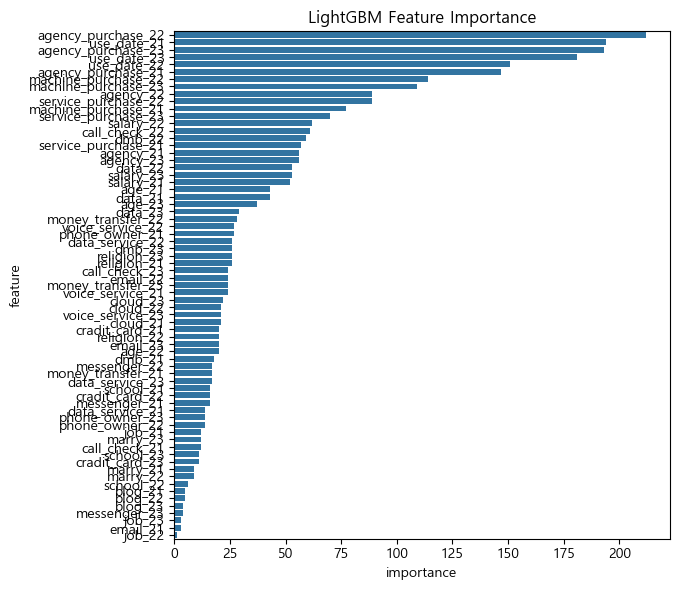

In [49]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
file_path = './data/phone_information.csv'
phone_df = pd.read_csv(file_path)

# 데이터 전처리: 문자열을 정수형으로 변환
phone_df = phone_df.apply(pd.to_numeric, errors='coerce')

# NaN 값 처리: NaN 값을 0으로 채우기
phone_df.fillna(0, inplace=True)

# 범주형 변수 전처리
le = LabelEncoder()
categorical_features = ['service_purchase_21', 'money_transfer_21']

for feature in categorical_features:
    phone_df[feature] = le.fit_transform(phone_df[feature].astype(str))

# 전체 컬럼을 selected_features에 담기
selected_features = [col for col in phone_df.columns if col not in ['pid', 'churn', 'brand_22', 'brand_21', 'brand_22', 'brand_23']]

# 데이터 X, y
X = phone_df[selected_features]
y = (phone_df['brand_22'] != 1).astype(int)

# 데이터 훈련
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 모델 학습
lgb_clf = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_clf.fit(X_train, y_train)

# 예측 및 평가
lgb_pred = lgb_clf.predict(X_test)
lgb_accuracy = accuracy_score(y_test, lgb_pred)

print(f"LightGBM 성능: {classification_report(y_test, lgb_pred)}")
print(f"LightGBM 정확도: {lgb_accuracy:.4f}")

# LightGBM 특성 중요도
plt.figure(figsize=(12, 6))
importance_lgb = pd.DataFrame({
    'feature': selected_features,
    'importance': lgb_clf.feature_importances_
})
importance_lgb = importance_lgb.sort_values('importance', ascending=False)

plt.subplot(1, 2, 1)
sns.barplot(data=importance_lgb, x='importance', y='feature')
plt.title('LightGBM Feature Importance')

plt.tight_layout()
plt.show()


# 상관관계 15개만 추출하여, 적용하고 이탈 예측 LightGBM

C:\Users\Playdata\AppData\Local\Temp\ipykernel_24324\3760517554.py:11: DtypeWarning: Columns (29,33,34,35,36,37,38,39,40,41,42,53,57,58,59,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  phone_df = pd.read_csv(file_path)


[LightGBM] [Info] Number of positive: 1115, number of negative: 5558
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 76
[LightGBM] [Info] Number of data points in the train set: 6673, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167091 -> initscore=-1.606384
[LightGBM] [Info] Start training from score -1.606384
LightGBM 성능:               precision    recall  f1-score   support

           0       0.94      0.97      0.96      1429
           1       0.80      0.62      0.70       240

    accuracy                           0.92      1669
   macro avg       0.87      0.80      0.83      1669
weighted avg       0.92      0.92      0.92      1669

LightGBM 정확도: 0.9227


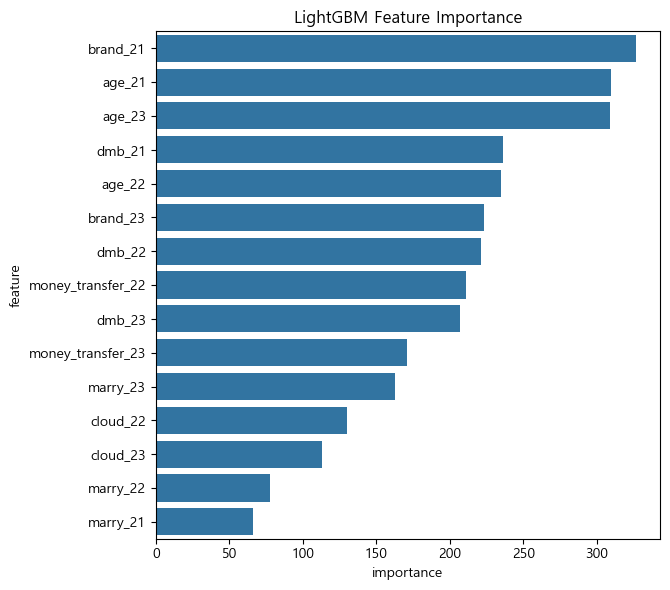

In [52]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
file_path = './data/phone_information.csv'
phone_df = pd.read_csv(file_path)

# 데이터 전처리: 문자열을 정수형으로 변환
phone_df = phone_df.apply(pd.to_numeric, errors='coerce')

# NaN 값 처리: NaN 값을 0으로 채우기
phone_df.fillna(0, inplace=True)

# 범주형 변수 전처리
le = LabelEncoder()
categorical_features = ['service_purchase_21', 'money_transfer_21']

for feature in categorical_features:
    phone_df[feature] = le.fit_transform(phone_df[feature].astype(str))

# 상관 관계 분석
correlation_matrix = phone_df.corr()

# 상관 관계가 높은 상위 15개의 특성 선택 (이탈 여부와 가장 높은 상관 관계를 갖는 특성 선택)
target = 'brand_22'
correlation_with_target = correlation_matrix[target].drop(target)
top_15_features = correlation_with_target.abs().sort_values(ascending=False).head(15).index.tolist()

# 데이터 X, y
X = phone_df[top_15_features]
y = (phone_df['brand_22'] != 1).astype(int)  # 이탈자(1) 예측

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 모델 학습
lgb_clf = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_clf.fit(X_train, y_train)

# 예측 및 평가
lgb_pred = lgb_clf.predict(X_test)
lgb_accuracy = accuracy_score(y_test, lgb_pred)

print(f"LightGBM 성능: {classification_report(y_test, lgb_pred)}")
print(f"LightGBM 정확도: {lgb_accuracy:.4f}")

# LightGBM 특성 중요도
plt.figure(figsize=(12, 6))
importance_lgb = pd.DataFrame({
    'feature': top_15_features,
    'importance': lgb_clf.feature_importances_
})
importance_lgb = importance_lgb.sort_values('importance', ascending=False)

plt.subplot(1, 2, 1)
sns.barplot(data=importance_lgb, x='importance', y='feature')
plt.title('LightGBM Feature Importance')

plt.tight_layout()
plt.show()



# 3년간 삼성 브랜드를 사용한 고객 제거

# LightGBM , GradientBoosting

In [56]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
file_path = './data/phone_information.csv'
phone_df = pd.read_csv(file_path)


# 3년간 삼성 브랜드를 사용한 고객만 필터링
phone_df = phone_df[(phone_df['brand_21'] == 1) | 
                    (phone_df['brand_22'] == 1) | 
                    (phone_df['brand_23'] == 1)]

# 3년간 삼성 브랜드를 사용하지 않은 고객 제거
phone_df = phone_df[~((phone_df['brand_21'] == 0) & 
                       (phone_df['brand_22'] == 0) & 
                       (phone_df['brand_23'] == 0))]

C:\Users\Playdata\AppData\Local\Temp\ipykernel_24324\494856510.py:12: DtypeWarning: Columns (29,33,34,35,36,37,38,39,40,41,42,53,57,58,59,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  phone_df = pd.read_csv(file_path)


In [67]:
# 데이터 전처리: 문자열을 정수형으로 변환
phone_df = phone_df.apply(pd.to_numeric, errors='coerce')

# NaN 값 처리: NaN 값을 0으로 채우기
phone_df.fillna(0, inplace=True)

# 범주형 변수 전처리
le = LabelEncoder()
categorical_features = ['service_purchase_21', 'money_transfer_21']

for feature in categorical_features:
    phone_df[feature] = le.fit_transform(phone_df[feature].astype(str))

# 상관 관계 분석
correlation_matrix = phone_df.corr()

# 상관 관계가 높은 상위 15개의 특성 선택 (이탈 여부와 가장 높은 상관 관계를 갖는 특성 선택)
target = 'brand_22'
correlation_with_target = correlation_matrix[target].drop(target)
top_15_features = correlation_with_target.abs().sort_values(ascending=False).head(15).index.tolist()

# 데이터 X, y
X = phone_df[top_15_features]
y = (phone_df['brand_22'] != 1).astype(int)  # 이탈자(1) 예측

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# LightGBM 모델 학습

[LightGBM] [Info] Number of positive: 475, number of negative: 5013
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 73
[LightGBM] [Info] Number of data points in the train set: 5488, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.086552 -> initscore=-2.356475
[LightGBM] [Info] Start training from score -2.356475
LightGBM 성능:               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1265
           1       0.67      0.33      0.44       107

    accuracy                           0.94      1372
   macro avg       0.81      0.66      0.70      1372
weighted avg       0.92      0.94      0.92      1372

LightGBM 정확도: 0.9351


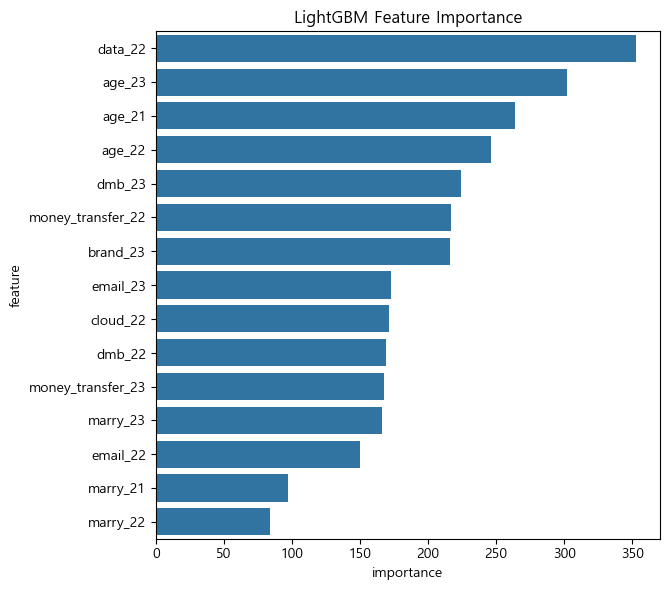

In [68]:
# LightGBM 모델 학습
lgb_clf = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_clf.fit(X_train, y_train)

# 예측 및 평가
lgb_pred = lgb_clf.predict(X_test)
lgb_accuracy = accuracy_score(y_test, lgb_pred)

print(f"LightGBM 성능: {classification_report(y_test, lgb_pred)}")
print(f"LightGBM 정확도: {lgb_accuracy:.4f}")

# LightGBM 특성 중요도
plt.figure(figsize=(12, 6))
importance_lgb = pd.DataFrame({
    'feature': top_15_features,
    'importance': lgb_clf.feature_importances_
})
importance_lgb = importance_lgb.sort_values('importance', ascending=False)

plt.subplot(1, 2, 1)
sns.barplot(data=importance_lgb, x='importance', y='feature')
plt.title('LightGBM Feature Importance')

plt.tight_layout()
plt.show()


# GradientBoosting

Gradient Boosting 성능:               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1265
           1       0.73      0.36      0.48       107

    accuracy                           0.94      1372
   macro avg       0.84      0.67      0.72      1372
weighted avg       0.93      0.94      0.93      1372

Gradient Boosting 정확도: 0.9395


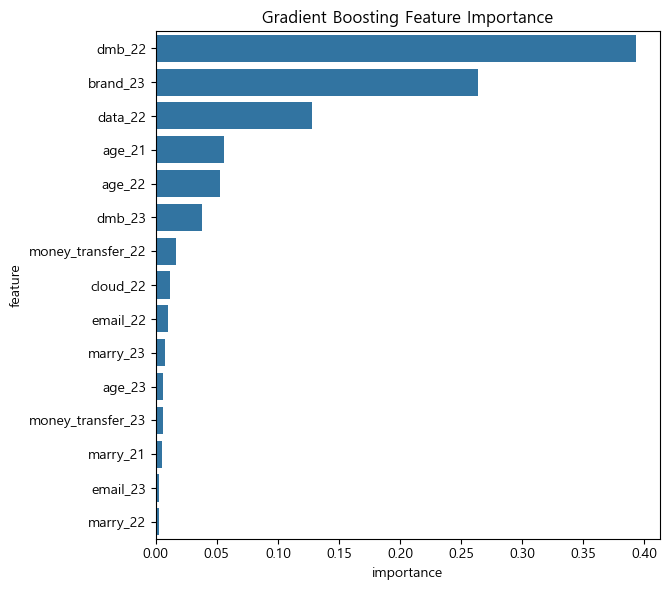

In [59]:
# Gradient Boosting 모델 학습
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

# 예측 및 평가
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print(f"Gradient Boosting 성능: {classification_report(y_test, gb_pred)}")
print(f"Gradient Boosting 정확도: {gb_accuracy:.4f}")

# Gradient Boosting 특성 중요도
plt.figure(figsize=(12, 6))
importance_gb = pd.DataFrame({
    'feature': top_15_features,
    'importance': gb_clf.feature_importances_
})
importance_gb = importance_gb.sort_values('importance', ascending=False)

plt.subplot(1, 2, 2)
sns.barplot(data=importance_gb, x='importance', y='feature')
plt.title('Gradient Boosting Feature Importance')

plt.tight_layout()
plt.show()


# RandomForest

Random Forest 성능:               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1265
           1       0.54      0.36      0.43       107

    accuracy                           0.93      1372
   macro avg       0.74      0.66      0.70      1372
weighted avg       0.92      0.93      0.92      1372

Random Forest 정확도: 0.9264


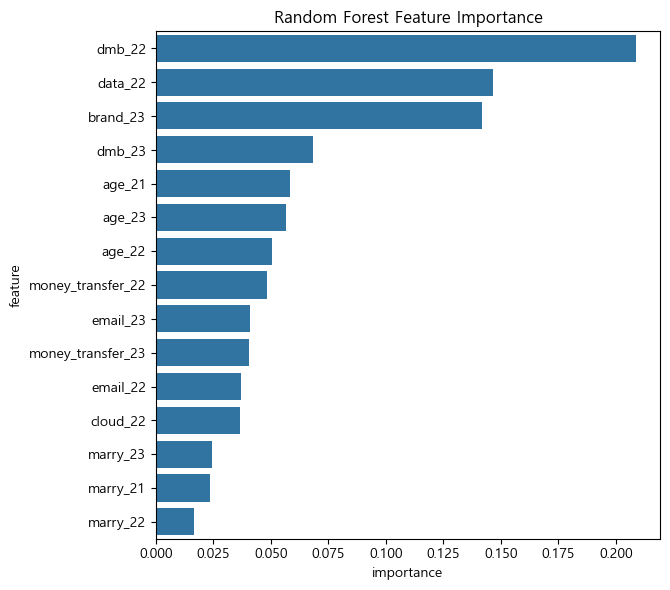

In [61]:
# Random Forest 모델 학습
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# 예측 및 평가
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"Random Forest 성능: {classification_report(y_test, rf_pred)}")
print(f"Random Forest 정확도: {rf_accuracy:.4f}")

# Random Forest 특성 중요도
plt.figure(figsize=(12, 6))
importance_rf = pd.DataFrame({
    'feature': top_15_features,
    'importance': rf_clf.feature_importances_
})
importance_rf = importance_rf.sort_values('importance', ascending=False)

plt.subplot(1, 2, 1)
sns.barplot(data=importance_rf, x='importance', y='feature')
plt.title('Random Forest Feature Importance')

plt.tight_layout()
plt.show()

# GradientBoost, LightGBM, RandomForest 3 모델 ROC CURVE 시각화

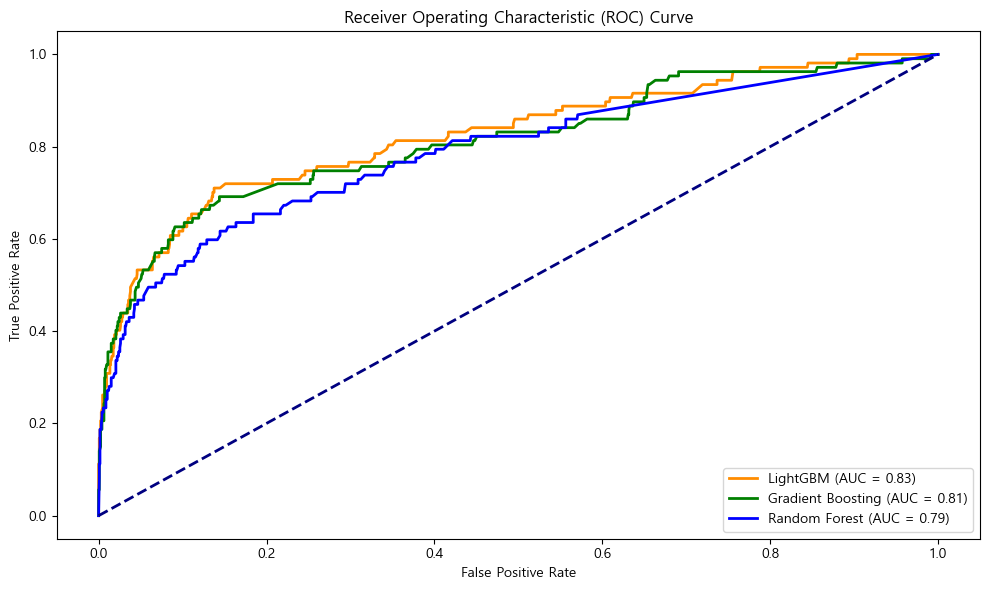

LightGBM 성능:               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1265
           1       0.67      0.33      0.44       107

    accuracy                           0.94      1372
   macro avg       0.81      0.66      0.70      1372
weighted avg       0.92      0.94      0.92      1372

Gradient Boosting 성능:               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1265
           1       0.73      0.36      0.48       107

    accuracy                           0.94      1372
   macro avg       0.84      0.67      0.72      1372
weighted avg       0.93      0.94      0.93      1372

Random Forest 성능:               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1265
           1       0.54      0.36      0.43       107

    accuracy                           0.93      1372
   macro avg       0.74      0.66      0.70      1372
weighted avg       0.

In [62]:
# 예측 확률 (ROC curve용)
lgb_pred_prob = lgb_clf.predict_proba(X_test)[:, 1]
gb_pred_prob = gb_clf.predict_proba(X_test)[:, 1]
rf_pred_prob = rf_clf.predict_proba(X_test)[:, 1]

# ROC curve 계산
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, lgb_pred_prob)
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_pred_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_prob)

# AUC 계산
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)
roc_auc_gb = auc(fpr_gb, tpr_gb)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# ROC 커브 시각화
plt.figure(figsize=(10, 6))

# LightGBM ROC curve
plt.plot(fpr_lgb, tpr_lgb, color='darkorange', lw=2, label=f'LightGBM (AUC = {roc_auc_lgb:.2f})')

# Gradient Boosting ROC curve
plt.plot(fpr_gb, tpr_gb, color='green', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

# Random Forest ROC curve
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# 대각선 (랜덤 예측 성능)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# 제목 및 라벨 설정
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# 그래프 출력
plt.tight_layout()
plt.show()

# 각 모델 성능 출력
print(f"LightGBM 성능: {classification_report(y_test, lgb_clf.predict(X_test))}")
print(f"Gradient Boosting 성능: {classification_report(y_test, gb_clf.predict(X_test))}")
print(f"Random Forest 성능: {classification_report(y_test, rf_clf.predict(X_test))}")

# 시각화 자료(정확도 비교 막대그래프)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_24324\1330965159.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')


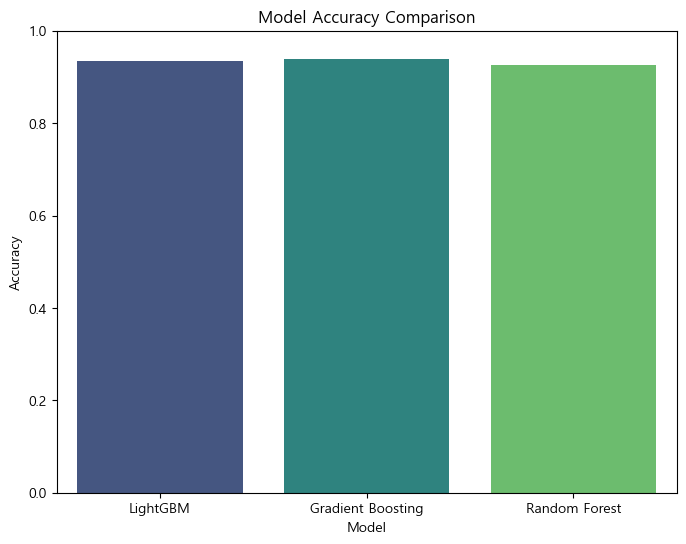

In [64]:
# 정확도 값을 모델 이름과 함께 리스트로 저장
accuracies = {
    'LightGBM': lgb_accuracy,
    'Gradient Boosting': gb_accuracy,
    'Random Forest': rf_accuracy
}

# 정확도 비교 막대그래프
plt.figure(figsize=(8, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


# 시각화 자료(2. Precision, Recall, F1-score 비교)

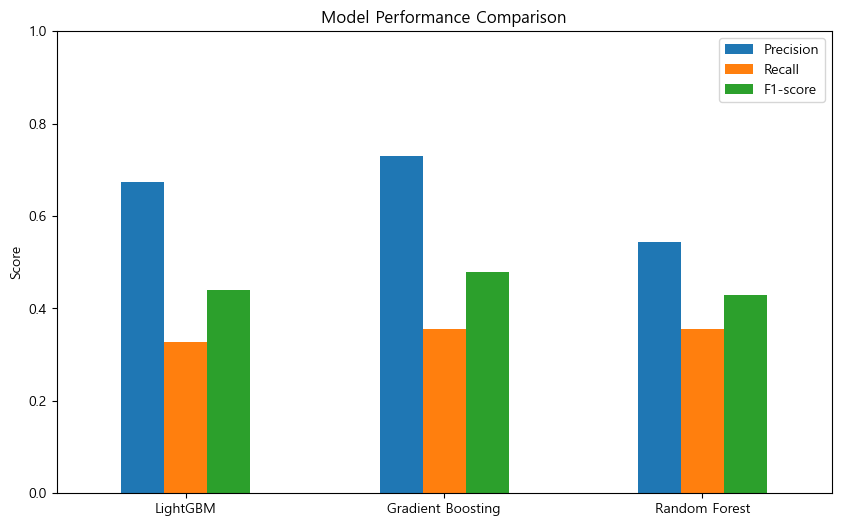

In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 각 모델의 Precision, Recall, F1-score 계산
lgb_precision = precision_score(y_test, lgb_pred)
lgb_recall = recall_score(y_test, lgb_pred)
lgb_f1 = f1_score(y_test, lgb_pred)

gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)

rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

# 각 모델의 성능 지표 저장
metrics = {
    'Precision': [lgb_precision, gb_precision, rf_precision],
    'Recall': [lgb_recall, gb_recall, rf_recall],
    'F1-score': [lgb_f1, gb_f1, rf_f1]
}

# 성능 지표 비교 DataFrame
metrics_df = pd.DataFrame(metrics, index=['LightGBM', 'Gradient Boosting', 'Random Forest'])

# 성능 지표 비교 막대그래프
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()

# 삼성 브랜드 사용자만 필터링하고, 다른 브랜드 사용자를 제외한 후, 그 데이터를 사용하여 LightGBM, Gradient Boosting, Random Forest

C:\Users\Playdata\AppData\Local\Temp\ipykernel_24324\3494041144.py:3: DtypeWarning: Columns (29,33,34,35,36,37,38,39,40,41,42,53,57,58,59,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  phone_df = pd.read_csv(file_path)


[LightGBM] [Info] Number of positive: 460, number of negative: 5022
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 123
[LightGBM] [Info] Number of data points in the train set: 5482, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.083911 -> initscore=-2.390357
[LightGBM] [Info] Start training from score -2.390357
LightGBM 성능:               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1256
           1       0.63      0.35      0.45       115

    accuracy                           0.93      1371
   macro avg       0.79      0.66      0.71      1371
weighted avg       0.92      0.93      0.92      1371

Gradient Boosting 성능:               precision    recall  f1-score   support

           0       0.94      0

C:\Users\Playdata\AppData\Local\Temp\ipykernel_24324\3494041144.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')


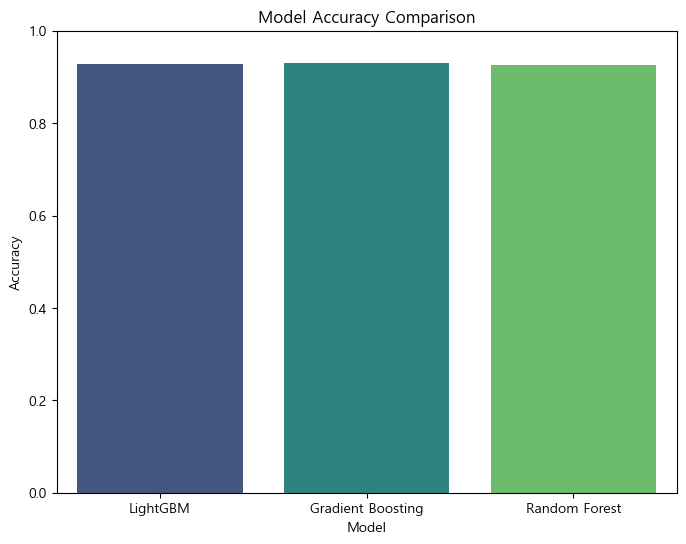

In [69]:
# 데이터 불러오기
file_path = './data/phone_information.csv'
phone_df = pd.read_csv(file_path)

# 삼성 브랜드 사용자만 필터링 (brand_21, brand_22가 1인 사용자만 유지)
phone_df = phone_df[(phone_df['brand_21'] == 1) | 
                    (phone_df['brand_22'] == 1)]

# 데이터 전처리: 문자열을 정수형으로 변환
phone_df = phone_df.apply(pd.to_numeric, errors='coerce')

# NaN 값 처리: NaN 값을 0으로 채우기
phone_df.fillna(0, inplace=True)

# 범주형 변수 전처리
le = LabelEncoder()
categorical_features = ['service_purchase_21', 'money_transfer_21']

for feature in categorical_features:
    phone_df[feature] = le.fit_transform(phone_df[feature].astype(str))

# 상관 관계 분석
correlation_matrix = phone_df.corr()

# 상관 관계가 높은 상위 15개의 특성 선택 (이탈 여부와 가장 높은 상관 관계를 갖는 특성 선택)
target = 'brand_22'
correlation_with_target = correlation_matrix[target].drop(target)
top_15_features = correlation_with_target.abs().sort_values(ascending=False).head(15).index.tolist()

# 데이터 X, y
X = phone_df[top_15_features]
y = (phone_df['brand_22'] != 1).astype(int)  # 이탈자(1) 예측

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 모델 학습
lgb_clf = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_clf.fit(X_train, y_train)

# Gradient Boosting 모델 학습
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

# Random Forest 모델 학습
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# 예측 및 평가
lgb_pred = lgb_clf.predict(X_test)
gb_pred = gb_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)

lgb_accuracy = accuracy_score(y_test, lgb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"LightGBM 성능: {classification_report(y_test, lgb_pred)}")
print(f"Gradient Boosting 성능: {classification_report(y_test, gb_pred)}")
print(f"Random Forest 성능: {classification_report(y_test, rf_pred)}")

# 모델 정확도 비교
accuracies = {
    'LightGBM': lgb_accuracy,
    'Gradient Boosting': gb_accuracy,
    'Random Forest': rf_accuracy
}

# 정확도 비교 막대그래프
plt.figure(figsize=(8, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


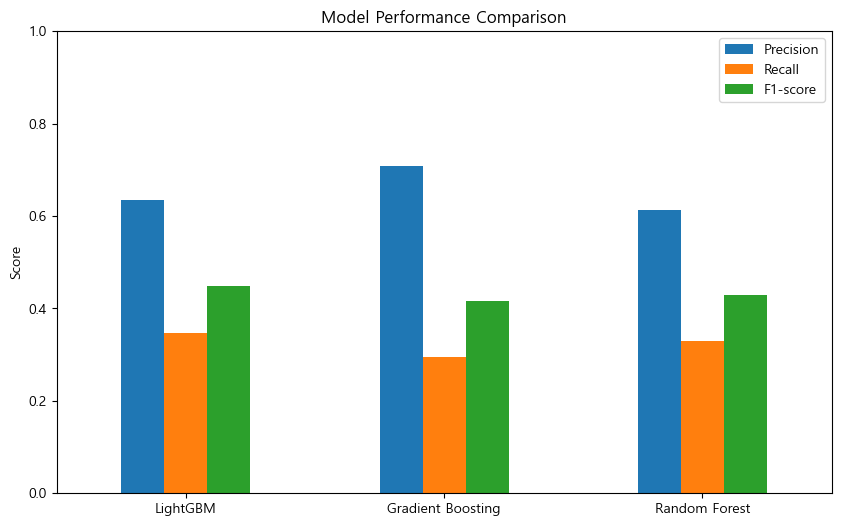

In [70]:

# Precision, Recall, F1-score 비교
from sklearn.metrics import precision_score, recall_score, f1_score

# 각 모델의 Precision, Recall, F1-score 계산
lgb_precision = precision_score(y_test, lgb_pred)
lgb_recall = recall_score(y_test, lgb_pred)
lgb_f1 = f1_score(y_test, lgb_pred)

gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)

rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

# 성능 지표 저장
metrics = {
    'Precision': [lgb_precision, gb_precision, rf_precision],
    'Recall': [lgb_recall, gb_recall, rf_recall],
    'F1-score': [lgb_f1, gb_f1, rf_f1]
}

# 성능 지표 비교 DataFrame
metrics_df = pd.DataFrame(metrics, index=['LightGBM', 'Gradient Boosting', 'Random Forest'])

# 성능 지표 비교 막대그래프
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()